## How to run 

* [Run on Google Colab](https://colab.research.google.com/github/cbernet/universal_approximation/blob/master/approx.ipynb) (feel free to change the runtime type to GPU if needed)
* Or run locally: 

```
conda create -n uniapprox python=3.7
conda activate uniapprox
conda install keras matplotlib jupyter
```

## Set up the tools

In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import os

# just to be able to run on my mac, probably not necessary on other platforms
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

## Function to be approximated: sinus

In [63]:
linx = np.linspace(-5, 5, 10001)
sinus = np.sin(linx)

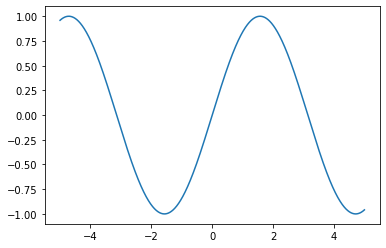

In [64]:
plt.plot(linx, sinus)

## Definition of the model 

Play with number of layers, number of neurons, ...

In [117]:
from keras import layers, models, optimizers

model = models.Sequential([
    layers.Dense(4, input_shape=(1,), activation='relu'),     
    layers.Dense(1), # no activation -> linear function of the input
])

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [118]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',
              optimizer=opt)
model.fit(linx, sinus, epochs=10, batch_size=20)

Epoch 1/10
10001/10001 [==============================] - 1s 85us/step - loss: 1.4525
Epoch 2/10
10001/10001 [==============================] - 1s 52us/step - loss: 0.2826
Epoch 3/10
10001/10001 [==============================] - 1s 51us/step - loss: 0.1595
Epoch 4/10
10001/10001 [==============================] - 1s 51us/step - loss: 0.0919
Epoch 5/10
10001/10001 [==============================] - 1s 51us/step - loss: 0.0563
Epoch 6/10
10001/10001 [==============================] - 1s 51us/step - loss: 0.0367
Epoch 7/10
10001/10001 [==============================] - 1s 51us/step - loss: 0.0258
Epoch 8/10
10001/10001 [==============================] - 1s 52us/step - loss: 0.0195
Epoch 9/10
10001/10001 [==============================] - 1s 51us/step - loss: 0.0157
Epoch 10/10
10001/10001 [==============================] - 1s 51us/step - loss: 0.0133


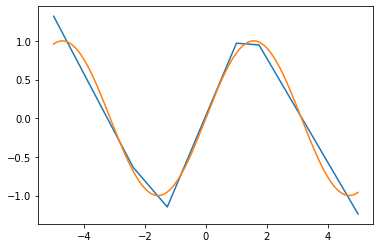

In [119]:
preds = model.predict(linx)
plt.plot(linx, preds)
plt.plot(linx, sinus)